# Fraud in Wine
Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

 # **Project Goals**

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.

**Goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'/content/wine_fraud.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [4]:
df.shape

(6497, 13)

# **Exploratory Data Analysis**

In [5]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
df.duplicated().sum()

np.int64(1177)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(5320, 13)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,7.215179,1.319671,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5320.0,0.344130,0.168248,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5320.0,0.318494,0.147157,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5320.0,5.048477,4.500180,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5320.0,0.056690,0.036863,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5320.0,30.036654,17.805045,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5320.0,114.109023,56.774223,6.00000,74.0000,116.00000,153.25000,440.00000
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5320.0,0.533357,0.149743,0.22000,0.4300,0.51000,0.60000,2.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   object 
 12  type                  5320 non-null   object 
dtypes: float64(11), object(2)
memory usage: 581.9+ KB


In [ ]:
df.quality.unique()

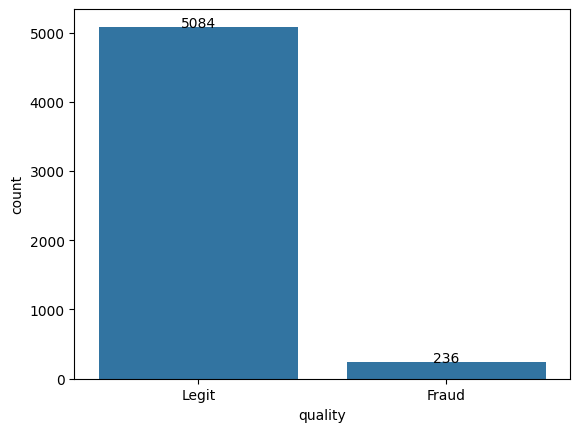

In [ ]:
value_counts = df.quality.value_counts()

sns.countplot(data=df, x='quality')
for i,j in enumerate(value_counts):
  plt.text(i,j,j,ha='center')
plt.show()

<Axes: xlabel='type', ylabel='count'>

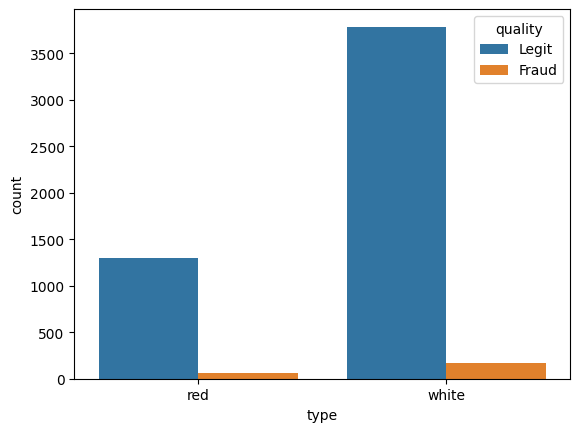

In [ ]:
sns.countplot(data=df, x='type', hue='quality')

In [ ]:
# percentage of red and white wines are Fraud
df.groupby('type')['quality'].value_counts()

type   quality
red    Legit      1296
       Fraud        63
white  Legit      3788
       Fraud       173
Name: count, dtype: int64

In [ ]:
# Red wine Fraud %

red = df[(df['quality'] == 'Fraud') & (df['type'] == 'red')]
print("Percentage of fraud in Red Wines:")
print(len(red)/len(df[df['type'] == 'red'])*100)

4.635761589403973


In [ ]:
# White wine fraud %

white = df[(df['quality']=='Fraud') & (df['type']=='white')]
print("Percentage of fraud in White Wines:")
print(len(white)/len(df[df['type']=='white'])*100)

Percentage of fraud in White Wines:
4.367583943448624


**Correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtype =='object':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.025957,-0.486253
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.160332,-0.645335
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.067037,0.183759
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,0.041803,0.328695
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.034605,-0.499517
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.088387,0.465326
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,0.037892,0.694229
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.028054,-0.429377
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,-0.018783,-0.310919
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.037451,-0.490364


<Axes: >

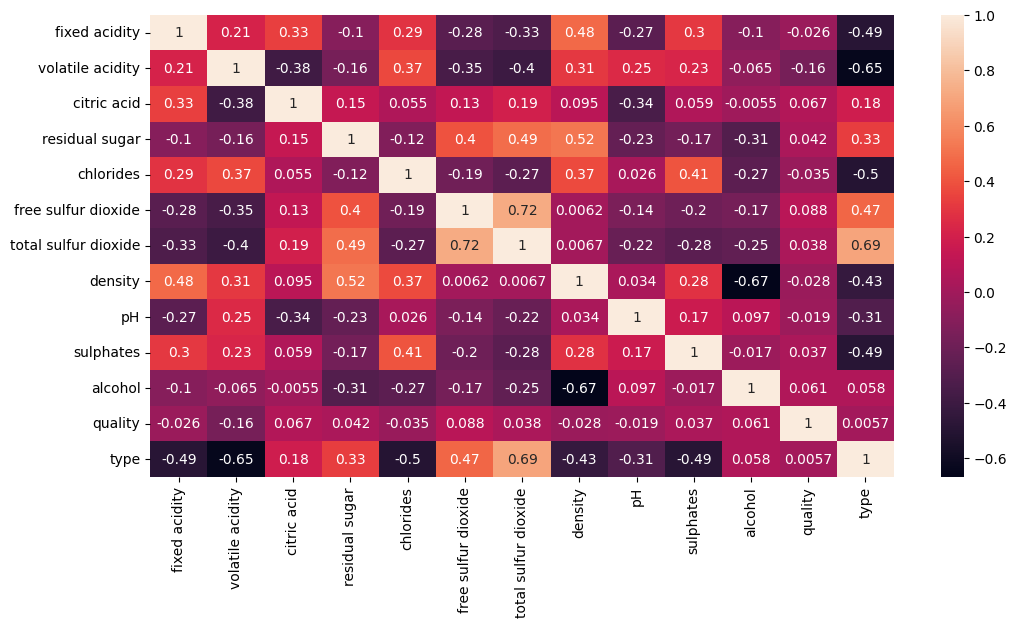

In [ ]:
# Plotting Heatmap
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True)

<Axes: >

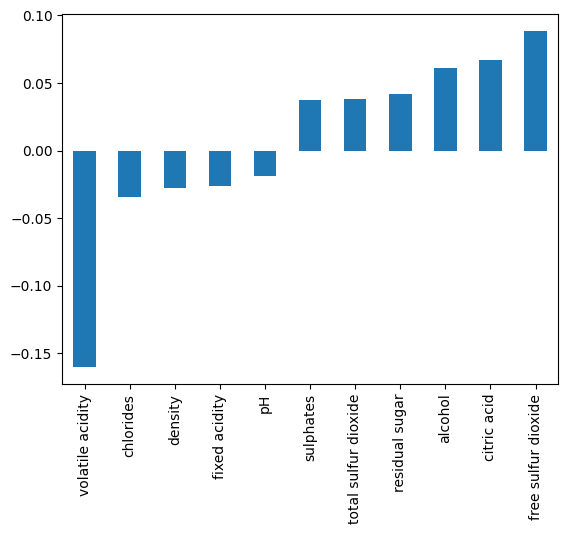

In [ ]:
# bar plot of the correlation values to Fraudlent wine.
df.corr()['quality'][:-2].sort_values().plot(kind='bar')

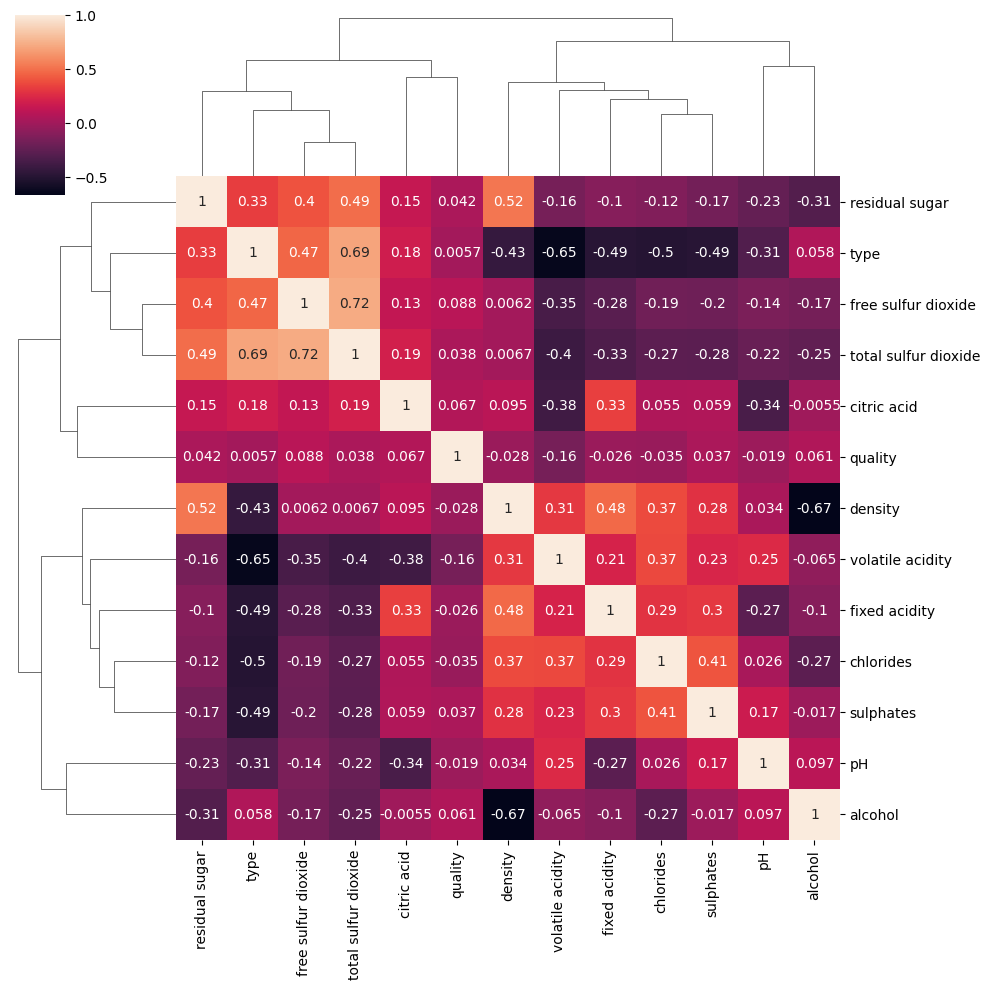

In [ ]:
# Clustermap with seaborn to explore the relationships between variables.
sns.clustermap(df.corr(),annot=True)


# **Machine Learning Model**

**Train_Test_Split**

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('quality',axis = 1)
y = df['quality']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(4256, 1064, 4256, 1064)

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


**The classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call.**

**Method 1**

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [ ]:
y_train_smote.value_counts()

,count
quality,
1,4062
0,4062


**Method 2**

**IMPORTANT NOTE:**

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

Reason: we know that Fraud cases are very small proporation compared to Legit cases. So during training we want to weight more on Fraud cases so that model can learn more. As balanced mode is inversely proportaional, the less the cases appear, the more weight it will be put on.

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(class_weight = 'balanced')
svc_model.fit(x_train,y_train)

SVC(class_weight='balanced')

In [ ]:
svc_pred = svc_model.predict(x_test)
svc_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Evaluation
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
precision = precision_score(y_test,svc_pred)
recall = recall_score(y_test,svc_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.9875
Recall: 0.850293542074364


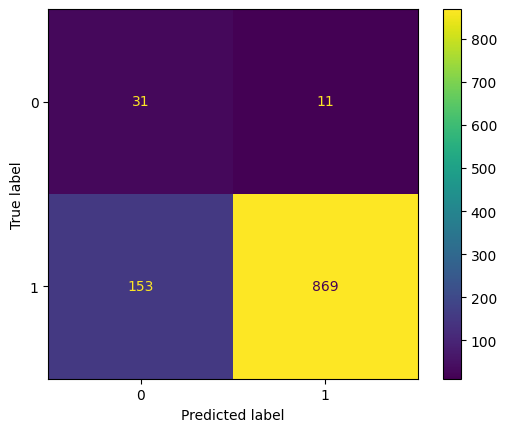

In [ ]:
cm = confusion_matrix(y_test,svc_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = svc_model.classes_)
display.plot()
plt.show()

In [ ]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.17      0.74      0.27        42
           1       0.99      0.85      0.91      1022

    accuracy                           0.85      1064
   macro avg       0.58      0.79      0.59      1064
weighted avg       0.96      0.85      0.89      1064



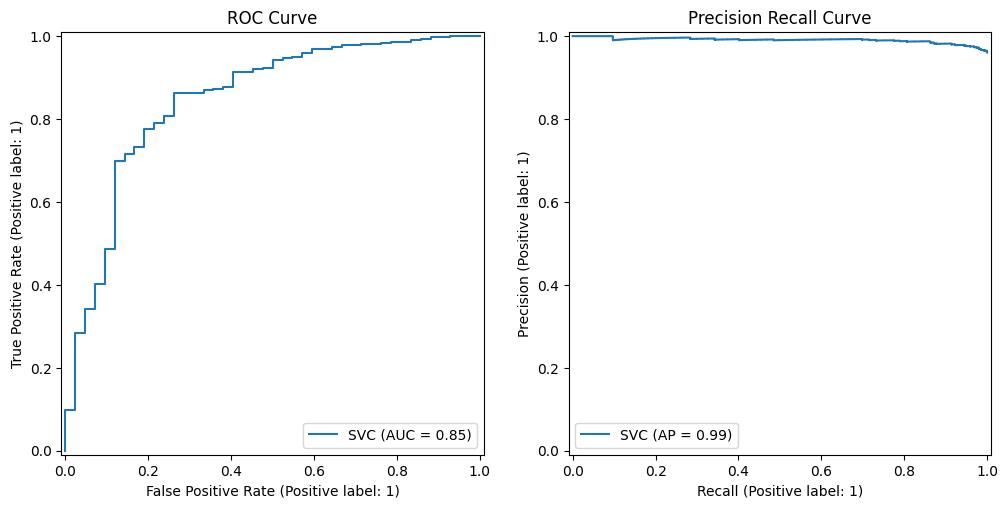

In [ ]:
# ROC curve & Precision recall curve
from sklearn.metrics import RocCurveDisplay,PrecisionRecallDisplay

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
RocCurveDisplay.from_estimator(svc_model,x_test,y_test,ax = ax1)
ax1.set_title('ROC Curve')
PrecisionRecallDisplay.from_estimator(svc_model,x_test,y_test,ax = ax2)
ax2.set_title('Precision Recall Curve')
plt.show()

**As we see model is not performing well, we will try to best fit the model using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {

    'C': np.linspace(0,1,20),
    'kernel':['linear','poly','rbf'],
    'degree':[1,2,3],
    'gamma':['scale','auto']
}


In [ ]:
svc_grid_model = GridSearchCV(svc_model,parameters)
svc_grid_model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'degree': [1, 2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
svc_grid_model.best_params_

{'C': np.float64(0.05263157894736842),
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly'}

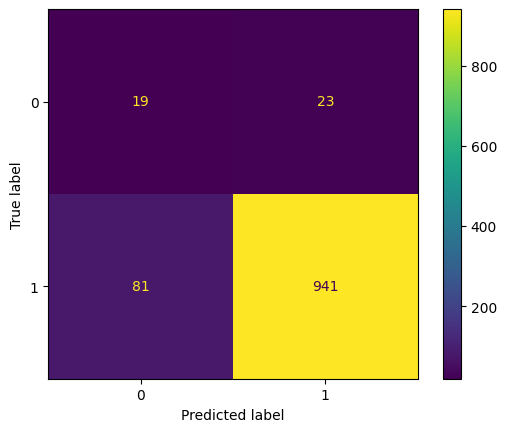

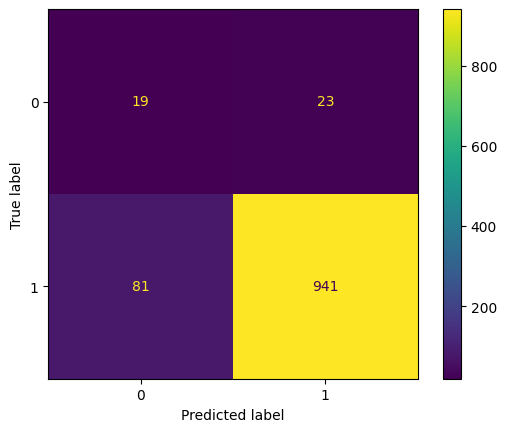

In [ ]:
# Confusion Matrix
cm = confusion_matrix(svc_grid_pred,y_test)
display = ConfusionMatrixDisplay.from_estimator(svc_grid_model,x_test,y_test,display_labels = svc_grid_model.classes_)
display.plot()
plt.show()


In [ ]:
# Evaluation
svc_grid_pred = svc_grid_model.predict(x_test)

classification_report = classification_report(y_test,svc_grid_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.19      0.45      0.27        42
           1       0.98      0.92      0.95      1022

    accuracy                           0.90      1064
   macro avg       0.58      0.69      0.61      1064
weighted avg       0.95      0.90      0.92      1064



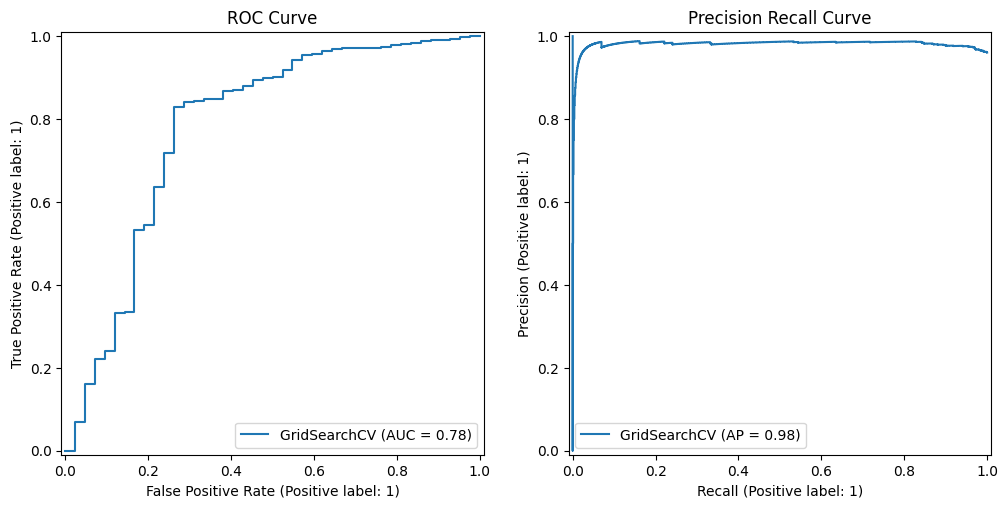

In [ ]:
# ROC & Precision Recall
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
RocCurveDisplay.from_estimator(svc_grid_model,x_test,y_test,ax = ax1)
ax1.set_title('ROC Curve')
PrecisionRecallDisplay.from_estimator(svc_grid_model,x_test,y_test,ax = ax2)
ax2.set_title('Precision Recall Curve')
plt.show()

Using chemical analysis to detect wine fraud can be a first step. However we might we want to expand the features such as where we made the purchase, what the label looks like, etc.